In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

#pd.set_option('display.max_rows', 1000)
#pd.set_option('display.max_columns', 4)
#pd.set_option('max_colwidth', 10000)
#pd.set_option('display.expand_frame_repr', False)
#pd.set_option('display.max_rows', None)

# https://regex101.com/
# https://docs.python.org/3/library/re.html

# I. Preprocessing des données

In [2]:
df = pd.read_csv("/Users/lyes/Desktop/MD5/Project Data/projet_final/Data_cars.csv")

In [118]:
df.head()

,Price,Make,...,Online,Description
0,11220.0,PEUGEOT,...,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI FAP 92CH BUSINESS 5P, puissance_fiscale: 4, portes: 5.0, options: banquette arrière 3 places;volant cuir;cache bagages;airbag frontal;banquette 1/3 - 2/3;sièges rang 2 rabattables à plat;vitres teintées;boucliers av et ar couleur caisse;phares av. de jour à LED;airbags rideaux;rétroviseurs électriques et dégivrants;siège conducteur avec réglage lombaire;vitres électriques;feux de freinage d'urgence;banquette rabattable;feux ar. à LED;AFU;contrôle de pression des pneus;airbags front. + lat.;blanc banquise;lampes de lecture à l'arrière;sièges réglables en hauteur;alarme d'oubli d'extinction des feux;EBD;volant sport;température extérieure;système audio;becquet;feux automatiques;fermeture électrique;ESP;fermeture électrique automatique;bacs de portes avant;anti patinage;accoudoir central avant;commandes du système audio au volant;fixations ISOFIX;poches d'aumonières;lampes de lecture à l'avant;lunette arrière dégivrante;essuie-glace arrière;ordinateur de bord;phares halogènes;climatisation;volant réglable en hauteur et profondeur;siège conducteur réglable hauteur;boite à gants réfrigérée;ABS;ceintures avant ajustables en hauteur;prise 12V;ecran tactile multifonction;FAP;3 ceintures ar. 3 points;ouverture des vitres séquentielle, couleur: BLANC BANQUISE"
1,57526.0,BMW,...,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M SPORT BVA8, puissance_fiscale: 16, portes: 5.0, options: triangle de presignalisation et trousse de premiers secours;volant cuir;pack alu;affichage tête haute;GPS;appel d'urgence intelligent;prise 12v additionnelle;sieges advanced pour conducteur et passager avant;projecteurs antibrouillard;climatisation automatique multi zone;pack suspension adaptative;&quotcarbonschwarz&quot metallise;caméra de recul;finition m sport;jantes alu 20&quot;pack innovation;kit fumeurs;rétroviseurs rabattables électriquement;shadow line brillant;information trafic en temps reel rtti (3ans);aide parking;contrôle de pression des pneus;système audio Harman Kardon;surround view;sièges électrique à mémoire;conciergerie (3 ans);fonctions &quotma bmw a distance&quot;pack safety;airbag passager desactivable via la cle;services connecteddrive (bmw online 3 ans + bmw apps);pack M;planche de bord en cuir;info trafic tmc;lave-phares;ciel de pavillon anthracite;services bmw connecteddrive;rétroviseur int. jour/nuit auto;tapis de sol;feux de route anti-eblouissement;pack advanced full led;boulons antivol de roues, couleur: Carbonschwarz metallise"
2,80379.0,AUDI,...,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: III AVANT 4.0 TFSI 560 QUATTRO TIPTRONIC, puissance_fiscale: 47, portes: 5.0, options: banquette arrière 3 places;écran tactile;témoin de bouclage des ceintures av;palettes au volant;volant cuir;régulateur limiteur de vitesse;commande climatisation ar;pack dynamique;cache bagages;sorties d'échappement chromées;affichage tête haute;rétroviseurs électriques;airbag frontal;banquette 1/3 - 2/3;vision périphérique (360°);commandes vocales;vitres teintées;GPS;services connectés;prise audio USB;stations de webradio;poignées ton carrosserie;pare-brise thermique;système d'éclairage intelligent;régulateur de vitesse;siège conducteur à mémoire;inserts de porte carbone;rétroviseurs extérieurs à mémoire;carte main libre;jantes alu;siège passager à réglages électriques;boucliers av et ar couleur caisse;phares av. de jour à LED;airbags rideaux;colonne de direction électr. à mémoire;applications bois noir avec inserts alu;accoudoir central arrière;climatisation automatique multi zone;siège conducteur avec réglage lombaire;vitres électriques;feux de freinage d'urgence;eclairage d'ambiance;toit ouvrant rang 1 entrebaillant;siège passager chauffant;caméra de recul;inserts de tableau de bord carbone;banquette rabattable;filtre à pollen;siège passager avec réglage lombaire;tmc;kit téléphone main libre;rétrovi

In [5]:
df.dtypes

Price          float64
Make            object
Model           object
Model_year       int64
Mileage         object
Fuel            object
Gearbox         object
Online          object
Description     object
dtype: object

Mileage, Online and Description doivent être netoyé.

In [6]:
df.shape

(166695, 9)

In [7]:
maker_frequency = df['Make'].value_counts(normalize=True)
maker_frequency

RENAULT           0.184109
PEUGEOT           0.156687
CITROEN           0.105636
VOLKSWAGEN        0.067435
BMW               0.056534
                    ...   
INTERMECCANICA    0.000006
BURBY S           0.000006
MATRA             0.000006
SIMCA             0.000006
MPM MOTORS        0.000006
Name: Make, Length: 92, dtype: float64

Text(0, 0.5, 'Frequency')

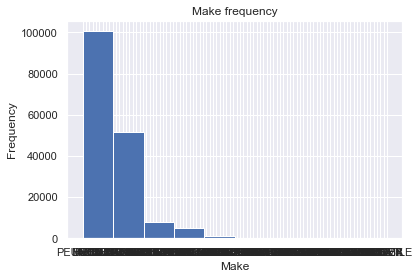

In [8]:
plt.hist(df['Make'])
plt.title('Make frequency')
plt.xlabel('Make')
plt.ylabel('Frequency')

# Data cleaning

In [119]:
df['Mileage'] = df['Mileage'].str.replace(".0 km","")
df['Mileage'] = df['Mileage'].astype("int32")

In [120]:
df['Online'] = pd.to_datetime(df['Online'], format='%d/%m/%Y à %Hh%M')

df['Online_date'] = df['Online'].dt.date
df['Online_time'] = df['Online'].dt.time

df['Online_year'] = df['Online'].dt.year
df['Online_month'] = df['Online'].dt.month
df['Online_month_day'] = df['Online'].dt.day
df['Online_hour'] = df['Online'].dt.hour
df['Online_minute'] = df['Online'].dt.minute
df['Online_week_day'] = df['Online'].dt.weekday

In [143]:
df['Description'].head(10)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

Description contient plusieurs sous-champs qui sont séparés par une **','**

Le sous-champs Options contient des paramètres séparés par des **';'**

Certains paramètres dans Options contiennet des valeurs spécifiques. 
Leur patern est : **'; parametre : valeur'**. 

Pour les paramettres suivants dans Options : 
- finition brillantes pneus 
- noir anthracite finition brillantes avec pneus
- 5 J x 21 Pneus '
- réglages électriques des sièges -Conducteur

le patern est **', parametre : valeur'**

In [189]:
# Trouver les détail des champs dans Decription : separation par des ','
str_list = df['Description'].str.findall(r'(^.[^,;]*?:|,[^,;]*?:)').values.tolist()
str_list = list(filter(None, str_list))
flat_list = [item for sublist in str_list for item in sublist]
details = set(flat_list)
#details = [w.replace(', ', '') for w in details]
#details = [w.replace(':', '') for w in details]
details

{', couleur:',
 ', finition brillantes pneus :',
 ', noir anthracite finition brillantes avec pneus :',
 ', options:',
 ', portes:',
 ', puissance_fiscale:',
 ', réglages électriques des sièges -Conducteur :',
 ', version:',
 ',5 J x 21 Pneus :',
 'modele:'}

In [169]:
# Trouver les détail des champs dans Decription : separation par des ','
str_list = df['Description'].str.findall(r'(^.[^,; ]*?:|, [^,; ]*?:)').values.tolist()
str_list = list(filter(None, str_list))
flat_list = [item for sublist in str_list for item in sublist]
details = set(flat_list)
details = [w.replace(', ', '') for w in details]
details = [w.replace(':', '') for w in details]
details

['modele', 'version', 'puissance_fiscale', 'couleur', 'portes', 'options']

In [173]:
df[df['Description'].str.contains("finition brillantes pneus :")]['Description'].head(1)

7213    modele: RS3 (2E GENERATION) SPORTBACK, version: II (2) SPORTBACK 2.5 TFSI 400 QUATTRO S TRONIC, puissance_fiscale: 29, portes: 5.0, options: Rétroviseurs rabattables électriquement;Application décorative Carbone;Système audio carte digitale;Bluetooth inclut musique en streaming, connexion téléphone;Smart card / Smart key;Air conditionné 2 zones;Jantes en aluminium coulé en style Blade à 5 branches en noir anthracite brillant, finition brillantes pneus : 255/30 R19 AV et 235/35 R19 AR (uniquement sur RS 3 Sportback);Palettes au volant;Feux de croisement à LED;Freins régénérateurs;Antipatinage;Limiteur de vitesse;Sorties d'échappement Sport RS pour une sonorité encore plus sportive;Rétroviseurs extérieurs réglables, dégivrants et rabattables électriquement avec position automatique pour manoeuvre de stationnement et fonction jour / nuit automatiquecôté conducteur;Vitres arrière surteintées (Privacy glass);Volant suede & cuir;Alarme;Bang & Olufsen Sound System;Système de navigatio

In [174]:
df['modele'] = df['Description'].str.extract(r'(\bmodele\: \b.*?,)', expand=True) 
df['modele'] = df['modele'].str.replace("modele: ", "")
df['modele'] = df['modele'].str.replace(",", "")

df['version'] = df['Description'].str.extract(r'(\bversion\: \b.*?,)', expand=True)       
df['version'] = df['version'].str.replace("version: ", "")
df['version'] = df['version'].str.replace(",", "")

df['puissance_fiscale'] = df['Description'].str.extract(r'(\bpuissance_fiscale\: \b.*?,)', expand=True)       
df['puissance_fiscale'] = df['puissance_fiscale'].str.replace("puissance_fiscale: ", "")
df['puissance_fiscale'] = df['puissance_fiscale'].str.replace(",", "")

df['portes'] = df['Description'].str.extract(r'(\bportes\: \b.*?,)', expand=True)       
df['portes'] = df['portes'].str.replace("portes: ", "")
df['portes'] = df['portes'].str.replace(",", "")

df['couleur'] = df['Description'].str.extract(r'(\bcouleur\: \b.*?$)', expand=True)       
df['couleur'] = df['couleur'].str.replace("couleur: ", "")
df['couleur'] = df['couleur'].str.upper()

In [16]:
#df[['couleur_principal', 'couleur_second']] = df['couleur'].str.split(" ", expand=False)
#df[['couleur_principal', 'couleur_second']]
#df['couleur'].str.split(" ", expand=False)
df[['couleur_principal', 'couleur_second']] = df['couleur'].str.extract(r'(^.*? )( .*$)', expand=True)
df[['couleur_principal', 'couleur_second']]

In [17]:
x = df['couleur'].value_counts()
x

GRIS                     20934
BLANC                    20509
NOIR                     18362
ROUGE                     4527
BLEU                      4158
                         ...  
GRIS METALLISÉE              1
DESIGNO BLEU MYSTIQUE        1
GLACIER MÉTALLISÉ            1
AURORA SILVER                1
GRIS SELENITE MAGNO          1
Name: couleur, Length: 6672, dtype: int64

In [20]:
df['portes'].value_counts()

5.0    138807
3.0     11597
4.0      8540
2.0      6443
0.0        17
6.0         2
Name: portes, dtype: int64

In [3]:
#
df['options'] = df['Description'].str.extract(r'(\boptions\b.*?\b, couleur\b)', expand=True)       
df['options'] = df['options'].str.replace("options: ", "")
df['options'] = df['options'].str.replace(", couleur", "")
df['options']

0         banquette arrière 3 places;volant cuir;cache b...
1         triangle de presignalisation et trousse de pre...
2         banquette arrière 3 places;écran tactile;témoi...
3         direction assistée;jantes alu;rétroviseurs éle...
4         Volant alu & cuir;Bluetooth inclut musique en ...
                                ...                        
166690    banquette arrière 3 places;prise 220v;volant c...
166691    Peinture métallisée;Système audio écran tactil...
166692    banquette arrière 3 places;témoin de bouclage ...
166693    écran tactile;prises audio auxiliaires;cache b...
166694    régulateur limiteur de vitesse;airbags;carte m...
Name: options, Length: 166695, dtype: object

In [258]:
df['options'].isna().sum()

12941

In [241]:
# Trouver les détail des champs dans Decription : separation par des ','
# (?|[^;]*|) : séparation par les points-virgule.
df['parametres'] = (df['options'].str.findall(r'([^;]+)')).values.tolist()
#str_list = list(filter(None, str_list))
#flat_list = [item for sublist in str_list for item in sublist]
#parametres = set(flat_list)
#parametres = [w.replace(', ', '') for w in parametres]
#parametres = [w.replace(':', '') for w in parametres]
#parametres

# (?|[^;]*|) : séparation par les points-virgule.
# (?|;[^;]*:[^;]*;|) : récupération des ";.....:......;"
# .*,
# ,.*

In [256]:
#df['parametres'].apply(lambda x : type(x))#.str.replace(')
#df['parametres']#.values.replace(',','n')
#df['parametres'] 
df[df['Decription'].str.contains("finition brillantes pneus :")]['options']

KeyError: 'Decription'

In [257]:
df[df['Description'].str.contains("finition brillantes pneus :")]['options']

7213                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [5]:
df[~df['Description'].str.contains("options")]['Description']

Series([], Name: Description, dtype: object)